In this lab we will use simple linear regression to predict the car price.

Objective:

To know if the dealer is offering fair value for my trade-in.

To know if I put a fair on my car.

In [6]:
%pip install scikit-learn

In [8]:
import os #using another server
import pandas as pd  #analysis
import numpy as np #numerice analysis
import matplotlib.pyplot as plt #plot and visualize
import seaborn as sns #high user interface
from sklearn.linear_model import LinearRegression #for modeling sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import csv

We will use dataset of car price prediction hosted on IBM Cloud object

In [3]:
data_path = 'automobileEDA.csv'
df = pd.read_csv(data_path)   #read csv path
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [9]:
X = df.drop('price', axis=1)   #independent features drop from column 1st
Y = df['price']  #dependent features

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [11]:
X_train_simple = X_train['highway-mpg'].values.reshape(-1,1)
X_test_simple = X_test['highway-mpg'].values.reshape(-1,1)

In [12]:
simple_lm = LinearRegression()
simple_lm.fit(X_train_simple, Y_train)

LinearRegression()

In [13]:
y_hat_simple = simple_lm.predict(X_test_simple)

In [14]:
y_hat_simple[:5]

array([10530.19044542,  7150.17926639, 12220.19603494, 10530.19044542,
       13910.20162445])

In [15]:
simple_lm.intercept_

39260.28546717645

In [16]:
simple_lm.coef_.item()

-845.0027947574558

Calculating engine-size and horsepower

In [17]:
#For engine-size
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [18]:
X = df.drop('price', axis=1)   #independent features drop from column 1st
Y = df['price'] 

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [20]:
X_train_simple = X_train['engine-size'].values.reshape(-1,1)
X_test_simple = X_test['engine-size'].values.reshape(-1,1)

In [24]:
simple_lm = LinearRegression()
simple_lm.fit(X_train_simple, Y_train)

LinearRegression()

In [25]:
y_hat_simple = simple_lm.predict(X_test_simple)

In [27]:
y_hat_simple[:5]

array([12200.90004806,  7203.38742473, 12534.06755628,  7536.55493295,
       16532.07765495])

In [28]:
simple_lm.intercept_

-7789.150445273459

In [29]:
simple_lm.coef_.item()

166.58375411113175

In [30]:
#For horsepower
X = df.drop('price', axis=1)   #independent features drop from column 1st
Y = df['price'] 

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [32]:
X_train_simple = X_train['horsepower'].values.reshape(-1,1)
X_test_simple = X_test['horsepower'].values.reshape(-1,1)

In [34]:
simple_lm = LinearRegression()
simple_lm.fit(X_train_simple, Y_train)

LinearRegression()

In [35]:
y_hat_simple = simple_lm.predict(X_test_simple)

In [36]:
y_hat_simple[:5]

array([12166.10030237,  7173.74640389,  9928.14855478,  8550.94747933,
       15436.95285656])

In [37]:
simple_lm.intercept_

-4532.462737395461

In [38]:
simple_lm.coef_.item()

172.15013443062284

In [50]:
to_select = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']
X_train_mult = X_train[to_select].values
X_test_mult = X_test[to_select].values
print(X_test_mult)

[[  97. 2302.  120.   34.]
 [  68. 1967.   90.   38.]
 [  84. 2410.  122.   32.]
 [  76. 2024.   92.   34.]
 [ 116. 2551.  146.   30.]
 [  62. 2040.   92.   38.]
 [ 145. 2811.  156.   24.]
 [  88. 2328.  122.   32.]
 [ 115. 2824.  136.   22.]
 [  70. 1874.   90.   43.]
 [  92. 2326.  122.   34.]
 [  76. 2010.   92.   34.]
 [ 116. 2540.  146.   30.]
 [ 121. 2710.  164.   28.]
 [ 111. 2650.  108.   23.]
 [  97. 3075.  120.   24.]
 [  58. 1713.   92.   54.]
 [ 106. 3217.  145.   27.]
 [  69. 1971.   97.   37.]
 [  85. 2212.  109.   34.]
 [  86. 2304.  110.   33.]
 [  70. 2169.   98.   34.]
 [ 182. 3505.  209.   20.]
 [  95. 3075.  120.   24.]
 [  60. 1837.   79.   42.]
 [ 176. 4066.  258.   19.]
 [ 116. 2679.  146.   30.]
 [  68. 1890.   91.   31.]
 [  92. 2414.  122.   32.]
 [  69. 2037.   97.   37.]
 [ 114. 2912.  141.   28.]
 [  88. 2535.  122.   30.]
 [ 101. 2465.  110.   28.]
 [  69. 1938.   97.   37.]
 [ 161. 3016.  171.   24.]
 [ 160. 2808.  121.   26.]
 [ 116. 2403.  110.   30.]
 

In [51]:
mult_lm = LinearRegression()
mult_lm.fit(X_train_simple, Y_train)

LinearRegression()

In [54]:
y_hat_mult = mult_lm.predict(X_test_mult)

ValueError: X has 4 features, but LinearRegression is expecting 1 features as input.

In [ ]:
mult_lm.coef_

Exercise: 
.fit multple linear Regression with[engine-size, horsepower] is independent variable
to predict car price
.fit multiple linear regression with [normalized-losses, highway-mpg] as independent

Model Evaluation using visualization
. Now we have we developed our simple linear regression and multiple linear regression model 
. how do we evaluate them?
.we can evaluate our linear regression either visually or numerically
. Lets first evaluate our linear Regression model visually using Regression  Plot and Distributon plot.

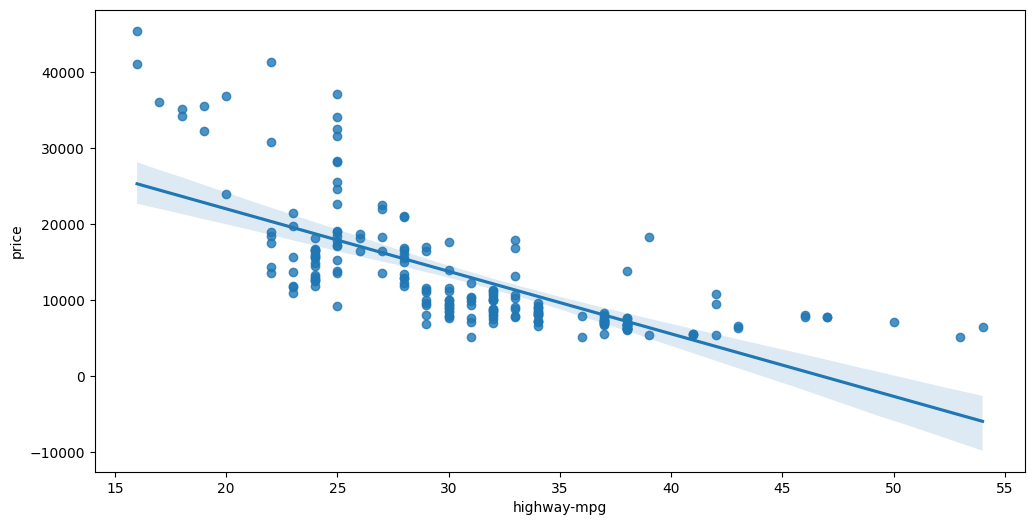

In [5]:
#Regression Plot
#1.simple linear Regression

plt.figure(figsize=(12,6))
sns.regplot(x= 'highway-mpg', y = 'price', data=df)
plt.show()

.we see slope of the line is negative, which we predict earlier when fitting simple linear regression line.
.more dispersed is the data point from the regression line, it will be not suitable model such data point with linear regression 
.hence, if the data is too far from the line, this linear model might not be best fit model for this data .
.in above plot,data is not perfectly linear 



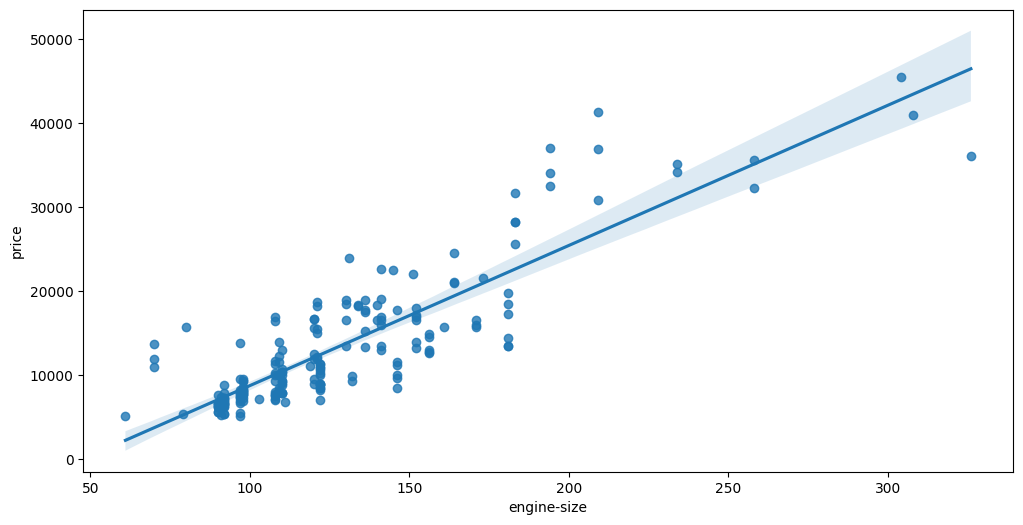

In [6]:
plt.figure(figsize=(12,6))
sns.regplot(x= 'engine-size', y = 'price', data=df)
plt.show()

This Shows that increase in engine size increase the Price of the car i.e. positive correlation 

DIstribution Plot
.We successfully visualize simple linear regression model using regression plot. it will be complicated for multiple linear regression since there will be multiple independent variables, in such scenario we could using distribution plot.
.now lets visualize our prediction from linear regression model using distribution plot.

In [ ]:
#1, Simple linear Regression
plt.figure(figsize= (12,6))
ax1 = sns.displot(Y_test, hist= False, color='r' label = "Actual-Size")
sns.displot(y_hat_simple, hist= False, )

.From above 2 distribution plot, we can say that ,
  . modeling using multiple linear regression is far better than compared

In [5]:
data_path = 'automobileEDA.csv'
df = pd.read_csv(data_path)   #read csv path
df


#define URL where dataset is located
# url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"

#read in data
# data = pd.read_csv(url)

#fit regression model
model = LinearRegression()
X, y = df[['price']], df.horsepower
model.fit(X, y)

#display adjusted R-squared
1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)


0.6536793764212635

In [9]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

#display adjusted R-squared
print(model.rsquared_adj)

0.6536793764212636
